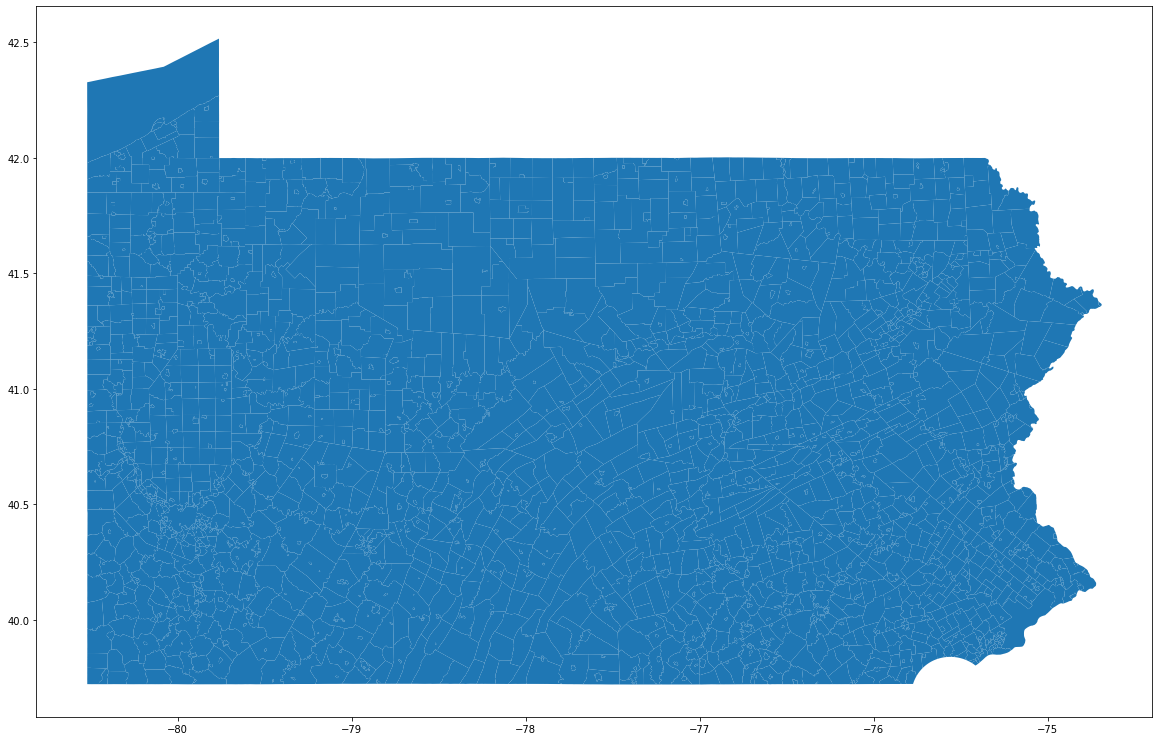

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = '/Users/edwardamoah/Downloads/tl_2016_42_cousub/tl_2016_42_cousub.shp'
data = gpd.read_file(shapefile_path)

# Plot the shapefile
data.plot(figsize=(20, 15))

# Show the plot
plt.show()


In [6]:
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/edwardamoah/Downloads/observations-387966.csv')

In [9]:
df.columns.tolist()

['id',
 'observed_on_string',
 'observed_on',
 'time_observed_at',
 'time_zone',
 'user_id',
 'user_login',
 'user_name',
 'created_at',
 'updated_at',
 'quality_grade',
 'license',
 'url',
 'image_url',
 'sound_url',
 'tag_list',
 'description',
 'num_identification_agreements',
 'num_identification_disagreements',
 'captive_cultivated',
 'oauth_application_id',
 'place_guess',
 'latitude',
 'longitude',
 'positional_accuracy',
 'private_place_guess',
 'private_latitude',
 'private_longitude',
 'public_positional_accuracy',
 'geoprivacy',
 'taxon_geoprivacy',
 'coordinates_obscured',
 'positioning_method',
 'positioning_device',
 'species_guess',
 'scientific_name',
 'common_name',
 'iconic_taxon_name',
 'taxon_id']

In [14]:
cl = ['id',
 'observed_on_string',
 'observed_on',
 'time_observed_at',
 'created_at',
 'updated_at',
 'latitude',
 'longitude',
 'geoprivacy',
 'scientific_name',]

In [16]:
df = df[cl]

In [18]:
def extract_month(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    return df

df1 = extract_month(df, 'observed_on')

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1075543496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1075543496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df[date_column].dt.month


In [20]:
def filter_by_month(df, month_column):
    df[month_column] = pd.to_datetime(df[month_column])
    filtered_df = df[df[month_column].dt.month.between(3, 5)]
    return filtered_df

df2 = filter_by_month(df1, 'observed_on')   

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/2383861592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[month_column] = pd.to_datetime(df[month_column])


In [22]:
df2.dropna(subset=['latitude', 'longitude'], inplace=True)

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1884027359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['latitude', 'longitude'], inplace=True)


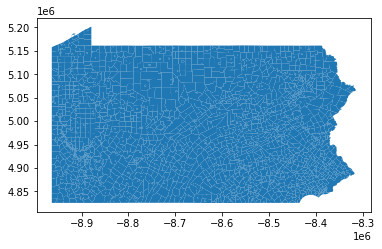

In [38]:
# Read the Pennsylvania shapefile
pennsylvania_shapefile_path = '/Users/edwardamoah/Downloads/Pennsylvania_Municipality_Boundary/Pennsylvania_Municipality_Boundary.shp'
pennsylvania_data = gpd.read_file(pennsylvania_shapefile_path)

# Plot the Pennsylvania map
pennsylvania_data.plot()

# Plot the points from df2 on the map
#df2.plot(ax=plt.gca(), marker='o', color='red', markersize=5)

df2.plot(ax = ax, kind='scatter', x='longitude', y='latitude', alpha=0.4)

# Show the plot
plt.show()


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

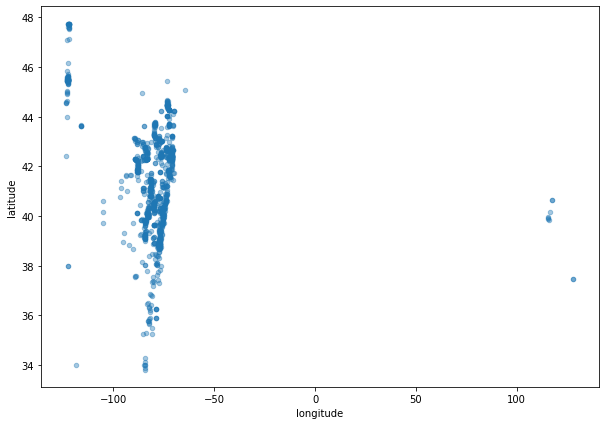

In [26]:
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7))

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

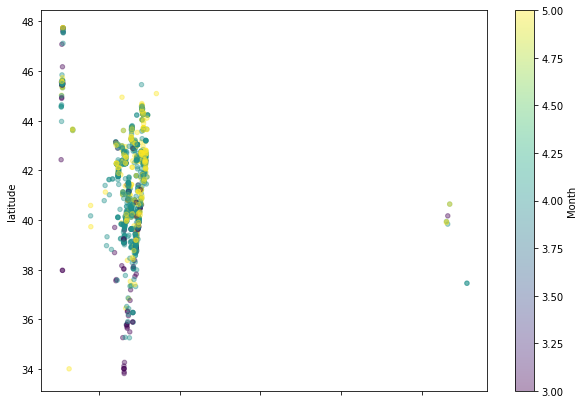

In [27]:
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7), c='Month', cmap=plt.get_cmap('jet'), colorbar=True)

In [28]:
df2.head()

,id,observed_on_string,observed_on,time_observed_at,created_at,updated_at,latitude,longitude,geoprivacy,scientific_name,Month
0,66357,2012-04-15,2012-04-15,NaN,2012-04-16 11:32:38 UTC,2017-11-26 14:39:23 UTC,40.806909,-77.914590,NaN,Osmia cornifrons,4.0
2,2735164,2015-05-10 16:15:44,2015-05-10,2015-05-10 20:15:44 UTC,2016-03-01 18:13:04 UTC,2023-07-08 12:27:22 UTC,40.301840,-75.035696,NaN,Osmia cornifrons,5.0
3,2933310,2016-04-13 2:00pm,2016-04-13,2016-04-13 18:00:00 UTC,2016-04-14 16:24:45 UTC,2019-03-04 05:16:54 UTC,40.495938,-74.424318,NaN,Osmia cornifrons,4.0
4,2993876,2016-04-21 1:20:58 PM EDT,2016-04-21,2016-04-21 17:20:58 UTC,2016-04-21 17:23:57 UTC,2023-07-08 13:03:03 UTC,42.446503,-76.479156,NaN,Osmia cornifrons,4.0
5,2993878,2016-04-21 1:23:12 PM EDT,2016-04-21,2016-04-21 17:23:12 UTC,2016-04-21 17:24:00 UTC,2023-07-08 13:02:59 UTC,42.446753,-76.478972,NaN,Osmia cornifrons,4.0


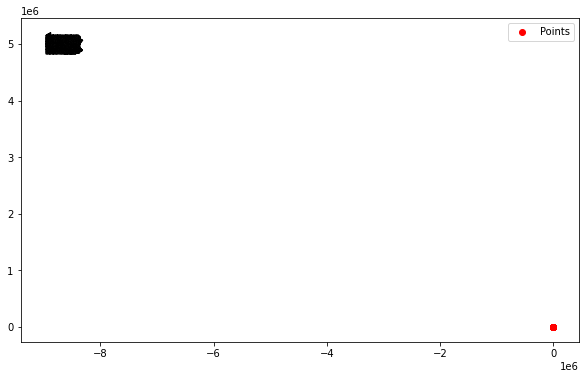

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile
shapefile_path = '/Users/edwardamoah/Downloads/Pennsylvania_Municipality_Boundary/Pennsylvania_Municipality_Boundary.shp'
gdf = gpd.read_file(shapefile_path)

# Load DataFrame with points
df_points = df2 #pd.read_csv('your_dataframe.csv')

# Plot shapefile
ax = gdf.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot points
plt.scatter(df_points['longitude'], df_points['latitude'], color='red', marker='o', label='Points')

# Show plot
plt.legend()
plt.show()


In [40]:
df2.to_csv('/Users/edwardamoah/Downloads/osmia_spring.csv', index=False)

In [51]:
import os
def filterFiles(classes, folder):
    # open the txt file to read
    files = []
    for file_path in os.listdir(folder):
        #print(file)
        file = open(os.path.join(folder, file_path), 'r')
        lines = file.readlines()
        #print(li)
        for line in lines:
            #print(line)
            label = line.split()[0]
            #print(type(label))
            if int(label) in classes:
                files.append(file_path)
                break
    return files

        


In [52]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/test/labels"
files = filterFiles(classes, folder)
print(len(files))

10


In [53]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/train/labels"
files = filterFiles(classes, folder)
print(len(files))

152


In [54]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/valid/labels"
files = filterFiles(classes, folder)
print(len(files))

36


In [41]:
def removeFiles(files, folder):
    for file in os.listdir(folder):
        if file not in files:
            os.remove(os.path.join(folder, file))
            print(f"Remvoed {file}")

In [50]:
files

['motion_frame_14_jpg.rf.9cebca425574b00df5c480613ff6a7aa.txt',
 'motion_frame_38_jpg.rf.13ccce14f1b202edf3020b3aab869525.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.271e7e39099c8d3e25879e11fdfdd95d.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.abf2d3790aa2feadfbc4fc5c16491a99.txt',
 'motion_frame_30_jpg.rf.d00d8197881710ed2e95c3de7cef4fb5.txt',
 'motion_frame_38_jpg.rf.ddf9669074bd883f2ecdc844b10d0919.txt',
 'motion_frame_46_jpg.rf.e00bc27dee5c3aac49a72f0575a9594c.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.19233fc8d82ae9df40b6f5205f70bf87.txt',
 'motion_frame_38_jpg.rf.0ed05912b9b1212ba40dcab04c3219f7.txt',
 '2023-09-09_10_33_41_frame_1220_jpg.rf.82a31473e619a23407ff075866e4dcbf.txt',
 '2023-05-29_13_50_27_frame_677_jpg.rf.af5579db26ab7928112a6aa99842a934.txt',
 '2023-05-29_13_50_27_frame_13809_jpg.rf.65088781f49c990365e42de0d5f6c427.txt',
 'motion_frame_46_jpg.rf.5c1f9af333a7c27bfb886829ccbc4fda.txt',
 'motion_frame_30_jpg.rf.cc36e507355f2b82e686cd0fc1c25ce9.txt',
 '2023-09-0

In [45]:
train_files = [file.split(".txt")[0]+".jpg" for file in files]


In [46]:
train_files

['2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-09-15_10_00_31_frame_2970_jpg.rf.348b212627f16fba95d17370

In [1]:
################## Preprocess results data #############################

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

In [171]:
df = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/results.csv')

In [18]:
data.head()

,frame_number,motions_coordinates,detections_coordinates,detections_classes,frame_motions,frame_detections
0,1,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
1,2,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
2,3,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
3,4,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
4,5,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]


In [19]:
data.query(' frame_motions != "[]" ')

,frame_number,motions_coordinates,detections_coordinates,detections_classes,frame_motions,frame_detections
189,190,"(0.0, 339.0, 89.0, 103.0)","(36.734649658203125, 391.0087890625, 72.260345...",[4.0],"[(0, 339, 89, 103)]","[(36.734649658203125, 391.0087890625, 72.26034..."
190,191,"(0.5, 422.0, 122.5, 97.5)","(99.14739227294922, 546.7584228515625, 170.287...",[2.0],"[(0, 472, 209, 149), (1, 372, 36, 46)]","[(99.14739227294922, 546.7584228515625, 170.28..."
191,192,"(63.75, 499.25, 76.25, 61.75)","(196.71994018554688, 620.6429443359375, 164.54...",[4.0],"[(45, 564, 25, 31), (97, 548, 200, 142), (104,...","[(196.71994018554688, 620.6429443359375, 164.5..."
192,193,"(147.33333333333334, 571.6666666666666, 133.0,...","(0, 0, 0, 0)",[],"[(133, 617, 104, 64), (245, 596, 204, 124), (6...",[]
193,194,"(249.33333333333334, 594.1666666666666, 81.666...","(546.5755615234375, 667.465087890625, 128.2406...",[0.0],"[(275, 683, 27, 33), (431, 630, 65, 38), (478,...","[(546.5755615234375, 667.465087890625, 128.240..."
...,...,...,...,...,...,...
17751,17752,"(312.5, 72.5, 62.0, 49.5)","(0, 0, 0, 0)",[],"[(294, 88, 32, 28), (331, 57, 92, 71)]",[]
17752,17753,"(313.0, 74.0, 46.5, 44.0)","(0, 0, 0, 0)",[],"[(295, 89, 28, 27), (331, 59, 65, 61)]",[]
17753,17754,"(313.5, 75.5, 49.0, 42.0)","(0, 0, 0, 0)",[],"[(296, 90, 26, 25), (331, 61, 72, 59)]",[]
17754,17755,"(314.0, 77.5, 36.0, 39.5)","(0, 0, 0, 0)",[],"[(297, 90, 24, 26), (331, 65, 48, 53)]",[]


In [20]:
data.query(' frame_detections != "[]" ')

,frame_number,motions_coordinates,detections_coordinates,detections_classes,frame_motions,frame_detections
189,190,"(0.0, 339.0, 89.0, 103.0)","(36.734649658203125, 391.0087890625, 72.260345...",[4.0],"[(0, 339, 89, 103)]","[(36.734649658203125, 391.0087890625, 72.26034..."
190,191,"(0.5, 422.0, 122.5, 97.5)","(99.14739227294922, 546.7584228515625, 170.287...",[2.0],"[(0, 472, 209, 149), (1, 372, 36, 46)]","[(99.14739227294922, 546.7584228515625, 170.28..."
191,192,"(63.75, 499.25, 76.25, 61.75)","(196.71994018554688, 620.6429443359375, 164.54...",[4.0],"[(45, 564, 25, 31), (97, 548, 200, 142), (104,...","[(196.71994018554688, 620.6429443359375, 164.5..."
193,194,"(249.33333333333334, 594.1666666666666, 81.666...","(546.5755615234375, 667.465087890625, 128.2406...",[0.0],"[(275, 683, 27, 33), (431, 630, 65, 38), (478,...","[(546.5755615234375, 667.465087890625, 128.240..."
202,203,"(952.6666666666666, 419.0, 96.0, 78.3333333333...","(1192.73779296875, 314.5611877441406, 168.2705...",[4.0],"[(555, 647, 31, 61), (1211, 346, 69, 65), (109...","[(1192.73779296875, 314.5611877441406, 168.270..."
...,...,...,...,...,...,...
17723,17724,"(373.3333333333333, 60.666666666666664, 95.333...","(355.54248046875, 97.81057739257812, 108.32458...",[2.0],"[(407, 73, 126, 93), (414, 71, 22, 28), (299, ...","[(355.54248046875, 97.81057739257812, 108.3245..."
17724,17725,"(357.5, 55.0, 116.5, 103.0)","(356.1448669433594, 89.4291000366211, 118.2963...",[2.0],"[(412, 74, 121, 93), (303, 36, 112, 113)]","[(356.1448669433594, 89.4291000366211, 118.296..."
17725,17726,"(351.5, 55.5, 122.5, 101.5)","(351.65972900390625, 89.00091552734375, 111.19...",[2.0],"[(403, 73, 131, 96), (300, 38, 114, 107)]","[(351.65972900390625, 89.00091552734375, 111.1..."
17727,17728,"(296.0, 34.0, 239.0, 148.0)","(346.731689453125, 85.61012268066406, 101.3707...",[0.0],"[(296, 34, 239, 148)]","[(346.731689453125, 85.61012268066406, 101.370..."


In [22]:
def consecutive_occurrence_ranges(lst, element):
    occurrence_ranges = []
    start_index = None

    for i, item in enumerate(lst):
        if item == element:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                end_index = i - 1
                occurrence_ranges.append((start_index, end_index))
                start_index = None

    if start_index is not None:
        # If the last element in the list is the target element
        end_index = len(lst) - 1
        occurrence_ranges.append((start_index, end_index))

    return occurrence_ranges

# Example usage:
my_list = [1, 2, 2, 3, 3, 3, 4, 5, 5, 3, 3, 5, 5]
element_to_find = 3

result = consecutive_occurrence_ranges(my_list, element_to_find)
print(f"Index ranges of consecutive occurrences of {element_to_find}: {result}")


Index ranges of consecutive occurrences of 3: [(3, 5), (9, 10)]


In [30]:
def consecutive_occurrence_ranges1(lst, element):
    occurrence_ranges = []
    start_index = None

    for i, item in enumerate(lst):
        if item != element:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                end_index = i - 1
                occurrence_ranges.append((start_index, end_index))
                start_index = None

    if start_index is not None:
        # If the last element in the list is the target element
        end_index = len(lst) - 1
        occurrence_ranges.append((start_index, end_index))

    return occurrence_ranges

In [28]:
#data["motions_coordinates"].tolist()

In [29]:
my_list = data["motions_coordinates"].tolist()
element_to_find = '(0, 0, 0, 0)'
result = consecutive_occurrence_ranges(my_list, element_to_find)
print(f"Index ranges of consecutive occurrences of {element_to_find}: {result}")

Index ranges of consecutive occurrences of (0, 0, 0, 0): [(0, 188), (397, 433), (509, 608), (1065, 1397), (1399, 1400), (1409, 1991), (1996, 2003), (2016, 2057), (2159, 2192), (2195, 2196), (2204, 2204), (2227, 2445), (2454, 2718), (2743, 2828), (2830, 2830), (2913, 3332), (3335, 3363), (3373, 3592), (3609, 3610), (3646, 3646), (3782, 3844), (3931, 4376), (4476, 4991), (4994, 5496), (5526, 5532), (5534, 5539), (5550, 5551), (5555, 5555), (5557, 5557), (5559, 5559), (5564, 5564), (5568, 5575), (5588, 5591), (5666, 5698), (5708, 5715), (5793, 5964), (5968, 7418), (7424, 7450), (7457, 7457), (7474, 7515), (7557, 7648), (7652, 7652), (7660, 7669), (7691, 10011), (10033, 10090), (10102, 10113), (10115, 10138), (10157, 10516), (10545, 10554), (10566, 10855), (10880, 10880), (10895, 11157), (11166, 11209), (11242, 11564), (11580, 11860), (11982, 12901), (12932, 12932), (12934, 12934), (12947, 12985), (13076, 15611), (15613, 15614), (15621, 15654), (15656, 15669), (15672, 15682), (15692, 15927

In [31]:
my_list = data["motions_coordinates"].tolist()
element_to_find = '(0, 0, 0, 0)'
result = consecutive_occurrence_ranges1(my_list, element_to_find)
print(f"Index ranges of consecutive occurrences of {element_to_find}: {result}")

Index ranges of consecutive occurrences of (0, 0, 0, 0): [(189, 396), (434, 508), (609, 1064), (1398, 1398), (1401, 1408), (1992, 1995), (2004, 2015), (2058, 2158), (2193, 2194), (2197, 2203), (2205, 2226), (2446, 2453), (2719, 2742), (2829, 2829), (2831, 2912), (3333, 3334), (3364, 3372), (3593, 3608), (3611, 3645), (3647, 3781), (3845, 3930), (4377, 4475), (4992, 4993), (5497, 5525), (5533, 5533), (5540, 5549), (5552, 5554), (5556, 5556), (5558, 5558), (5560, 5563), (5565, 5567), (5576, 5587), (5592, 5665), (5699, 5707), (5716, 5792), (5965, 5967), (7419, 7423), (7451, 7456), (7458, 7473), (7516, 7556), (7649, 7651), (7653, 7659), (7670, 7690), (10012, 10032), (10091, 10101), (10114, 10114), (10139, 10156), (10517, 10544), (10555, 10565), (10856, 10879), (10881, 10894), (11158, 11165), (11210, 11241), (11565, 11579), (11861, 11981), (12902, 12931), (12933, 12933), (12935, 12946), (12986, 13075), (15612, 15612), (15615, 15620), (15655, 15655), (15670, 15671), (15683, 15691), (15928, 1

In [35]:
result[0]

(189, 396)

In [40]:
data.columns.tolist()

['frame_number',
 'motions_coordinates',
 'detections_coordinates',
 'detections_classes',
 'frame_motions',
 'frame_detections']

In [41]:
activity_range = result[0]
average_motion_coords = data["motions_coordinates"].tolist()[activity_range[0]: activity_range[1]]
average_dectections_coords = data["detections_coordinates"].tolist()[activity_range[0]: activity_range[1]]
detections_classes = data["detections_classes"].tolist()[activity_range[0]: activity_range[1]]
all_motion_cords = data["frame_motions"].tolist()[activity_range[0]: activity_range[1]]
all_detections_cords = data["frame_detections"].tolist()[activity_range[0]: activity_range[1]]

In [49]:
all_motion_cords

['[(0, 339, 89, 103)]',
 '[(0, 472, 209, 149), (1, 372, 36, 46)]',
 '[(45, 564, 25, 31), (97, 548, 200, 142), (104, 503, 54, 40), (9, 382, 26, 34)]',
 '[(133, 617, 104, 64), (245, 596, 204, 124), (64, 502, 91, 77)]',
 '[(275, 683, 27, 33), (431, 630, 65, 38), (478, 618, 158, 102), (136, 585, 154, 95), (64, 544, 42, 34), (112, 505, 44, 41)]',
 '[(274, 675, 30, 40), (552, 632, 65, 88), (137, 585, 146, 96), (674, 576, 287, 144), (67, 544, 35, 25), (112, 519, 34, 29)]',
 '[(551, 635, 67, 85), (137, 585, 143, 94), (899, 479, 235, 150)]',
 '[(553, 637, 63, 76), (137, 586, 142, 92), (1008, 574, 62, 25), (1050, 392, 230, 125)]',
 '[(553, 635, 60, 79), (138, 621, 85, 53), (209, 590, 70, 46), (1011, 576, 58, 24), (1150, 429, 69, 59), (1173, 348, 107, 72)]',
 '[(553, 632, 53, 85), (140, 627, 74, 45), (215, 591, 61, 43), (1016, 579, 39, 20), (1155, 430, 66, 53), (1259, 360, 21, 42)]',
 '[(553, 640, 50, 71), (145, 627, 68, 44), (226, 590, 46, 44), (1170, 441, 26, 26)]',
 '[(553, 642, 48, 70), (166,

In [54]:
import ast

In [56]:
xy_list = []
for row in all_motion_cords:
    row = ast.literal_eval(row)
    row_cords = []
    for cord in list(row):
        #print(cord)
        row_cords.append( (cord[0], cord[1]) )
    xy_list.append(row_cords)

In [57]:
xy_list

[[(0, 339)],
 [(0, 472), (1, 372)],
 [(45, 564), (97, 548), (104, 503), (9, 382)],
 [(133, 617), (245, 596), (64, 502)],
 [(275, 683), (431, 630), (478, 618), (136, 585), (64, 544), (112, 505)],
 [(274, 675), (552, 632), (137, 585), (674, 576), (67, 544), (112, 519)],
 [(551, 635), (137, 585), (899, 479)],
 [(553, 637), (137, 586), (1008, 574), (1050, 392)],
 [(553, 635), (138, 621), (209, 590), (1011, 576), (1150, 429), (1173, 348)],
 [(553, 632), (140, 627), (215, 591), (1016, 579), (1155, 430), (1259, 360)],
 [(553, 640), (145, 627), (226, 590), (1170, 441)],
 [(553, 642), (166, 627), (230, 590), (1266, 366), (1238, 342)],
 [(554, 645), (1175, 327)],
 [(555, 647), (1211, 346), (1092, 264)],
 [(555, 652), (1132, 304), (1007, 189)],
 [(1133, 253), (964, 160)],
 [(942, 208), (1035, 207)],
 [(977, 274), (1013, 195)],
 [(941, 285), (1013, 195)],
 [(966, 258), (1015, 196)],
 [(981, 302), (1002, 267), (901, 241), (1016, 195)],
 [(1002, 257), (911, 220), (1018, 197)],
 [(965, 276), (1002, 2

In [39]:
# process activity

def processActivity(data, activity_range):
    # extract activity information
    average_motion_coords = data["motions_coordinates"].tolist()[activity_range[0]: activity_range[1]]
    average_dectections_coords = data["detections_coordinates"].tolist()[activity_range[0]: activity_range[1]]
    detections_classes = data["detections_classes"].tolist()[activity_range[0]: activity_range[1]]
    all_motion_cords = data["frame_motions"].tolist()[activity_range[0]: activity_range[1]]
    all_detections_cords = data["frame_detections"].tolist()[activity_range[0]: activity_range[1]]

    # determine if there are multiple objects moving


['(0.0, 339.0, 89.0, 103.0)',
 '(0.5, 422.0, 122.5, 97.5)',
 '(63.75, 499.25, 76.25, 61.75)',
 '(147.33333333333334, 571.6666666666666, 133.0, 88.33333333333333)',
 '(249.33333333333334, 594.1666666666666, 81.66666666666667, 57.166666666666664)',
 '(302.6666666666667, 588.5, 99.5, 70.33333333333333)',
 '(529.0, 566.3333333333334, 148.33333333333334, 109.66666666666667)',
 '(687.0, 547.25, 124.25, 79.5)',
 '(705.6666666666666, 533.1666666666666, 74.83333333333333, 55.5)',
 '(723.0, 536.5, 52.333333333333336, 48.0)',
 '(523.5, 574.5, 47.5, 46.25)',
 '(690.6, 513.4, 38.6, 39.4)',
 '(864.5, 486.0, 75.0, 68.0)',
 '(952.6666666666666, 419.0, 96.0, 78.33333333333333)',
 '(898.0, 381.6666666666667, 123.0, 93.0)',
 '(1048.5, 206.5, 155.0, 138.5)',
 '(988.5, 207.5, 203.0, 152.5)',
 '(995.0, 234.5, 197.0, 150.5)',
 '(977.0, 240.0, 214.0, 151.0)',
 '(990.5, 227.0, 180.5, 162.0)',
 '(975.0, 251.25, 128.0, 101.75)',
 '(977.0, 224.66666666666666, 156.0, 137.66666666666666)',
 '(989.0, 235.75, 118.25,

In [38]:
result[0][1]

396

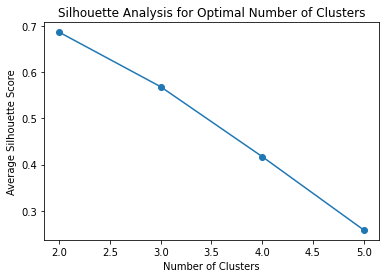

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate some sample X-Y coordinates
np.random.seed(42)
data = ast.literal_eval(all_motion_cords[9]) #np.random.rand(100, 2) * 10  # 100 data points in a 10x10 space

# Calculate silhouette scores for different numbers of clusters
max_clusters = 5
silhouette_scores = []

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()


In [64]:
len(data.tolist())

100

In [91]:
xy_list[9]

[(553, 632), (140, 627), (215, 591), (1016, 579), (1155, 430), (1259, 360)]

In [96]:
max([len(x) for x in xy_list])

7

In [88]:
data1 = xy_list[20]
data1 = ast.literal_eval(all_motion_cords[20])
kmeans = KMeans(2, random_state=42)
labels = kmeans.fit_predict(data1)

In [89]:
labels

array([0, 0, 0, 1], dtype=int32)

In [83]:
labels

array([1, 1, 0, 1], dtype=int32)

In [84]:
xy_list[20]

[(981, 302), (1002, 267), (901, 241), (1016, 195)]

In [121]:
ast.literal_eval(all_motion_cords[20])

[(981, 302, 29, 30),
 (1002, 267, 93, 106),
 (901, 241, 126, 61),
 (1016, 195, 264, 210)]

In [114]:

data1 = [(1,1), (1,1), (1,1), (2, 1), (2, 1), (3, 1)]
kmeans = KMeans(3, random_state=42)
labels = kmeans.fit_predict(data1)
labels

array([1, 1, 1, 0, 0, 2], dtype=int32)

In [125]:
ast.literal_eval(all_motion_cords[20])

[(981, 302, 29, 30),
 (1002, 267, 93, 106),
 (901, 241, 126, 61),
 (1016, 195, 264, 210)]

In [193]:
data1 = [(1,1), (1,1), (1,1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]
data1 = [(1,1), (1,1), (1,1), (1,1), (2,1), (2,1), (5,1), (5, 1), (2,1), (2, 1)]
#data1 = ast.literal_eval(all_motion_cords[20])

def getClusterNumber(data:list) -> int:
    '''
    Input: List of [(x,y), (x,y)]

    output: number of clusters in list based on silhoutte scores
    '''

    if len(data) < 2:
        return 1

    #Calculate silhouette scores for different numbers of clusters
    max_clusters = len(data)
    if max_clusters > 5: # No more than 5 clusters
        max_clusters = 5

    si_scores = {} # save scores
    # iterate over different k number and get scores
    for num_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        si_scores[num_clusters] = silhouette_avg


    max_key = max(si_scores, key=si_scores.get)


    return max_key

def extractMiddlePoints(coordinates):
    xywh_cords = ast.literal_eval(coordinates)
    xy_cords = [(cord[0],cord[1]) for cord in xywh_cords]
    return xy_cords


In [179]:
def extractMiddlePoints(coordinates):
    xywh_cords = ast.literal_eval(coordinates)
    xy_cords = [(cord[0],cord[1]) for cord in xywh_cords]
    return xy_cords


In [170]:

extractMiddlePoints(all_motion_cords[10])

[(553, 640, 50, 71), (145, 627, 68, 44), (226, 590, 46, 44), (1170, 441, 26, 26)]


[(553, 640), (145, 627), (226, 590), (1170, 441)]

In [176]:
df1 = pd.DataFrame({
    "motions": all_motion_cords,
    "detections": all_detections_cords, 
    "classes": detections_classes
})


df1["motions_xy"] = df1["motions"].apply(extractMiddlePoints)
df1["detections_xy"] = df1["detections"].apply(extractMiddlePoints)

In [220]:
df1.head()

,motions,detections,classes,motions_xy,motions_k
0,"[(0, 339, 89, 103)]","[(36.734649658203125, 391.0087890625, 72.26034...",[4.0],"[(0, 339)]",1
1,"[(0, 472, 209, 149), (1, 372, 36, 46)]","[(99.14739227294922, 546.7584228515625, 170.28...",[2.0],"[(0, 472), (1, 372)]",1
2,"[(45, 564, 25, 31), (97, 548, 200, 142), (104,...","[(196.71994018554688, 620.6429443359375, 164.5...",[4.0],"[(45, 564), (97, 548), (104, 503), (9, 382)]",2
3,"[(133, 617, 104, 64), (245, 596, 204, 124), (6...",[],[],"[(133, 617), (245, 596), (64, 502)]",2
4,"[(275, 683, 27, 33), (431, 630, 65, 38), (478,...","[(546.5755615234375, 667.465087890625, 128.240...",[0.0],"[(275, 683), (431, 630), (478, 618), (136, 585...",2


In [221]:
df1["motions_xy"] = df1["motions"].apply(extractMiddlePoints)
df1["detections_xy"] = df1["detections"].apply(extractMiddlePoints)

In [222]:
def getClusterNumber(data:list) -> int:
    '''
    Input: List of [(x,y), (x,y)]

    output: number of clusters in list based on silhoutte scores
    '''
    #print(data)
    #print(len(data))

    if len(data) < 2:
        return 1

    #Calculate silhouette scores for different numbers of clusters
    max_clusters = len(data) - 1
    if max_clusters > 5: # No more than 5 clusters
        max_clusters = 5

    si_scores = {
        1: 0.1
    } # save scores
    # iterate over different k number and get scores
    for num_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        #print(labels)
        silhouette_avg = silhouette_score(data, labels)
        si_scores[num_clusters] = silhouette_avg


    max_key = max(si_scores, key=si_scores.get)


    return max_key

In [225]:
df1["motions_k"] = df1["motions_xy"].apply(getClusterNumber)
df1["detections_k"] = df1["detections_xy"].apply(getClusterNumber)

In [215]:
df1.groupby("motions_k").count()

,motions,detections,classes,motions_xy
motions_k,,,,
1,70,70,70,70
2,126,126,126,126
3,10,10,10,10
4,1,1,1,1


In [218]:
df1.groupby("classes").count()

,motions,detections,motions_xy,motions_k
classes,,,,
[0.0],3,3,3,3
[2.0],9,9,9,9
"[4.0, 4.0]",2,2,2,2
[4.0],47,47,47,47
[],146,146,146,146


In [219]:
df1.groupby(["motions_k","classes"]).count()

motions  detections  motions_xy
motions_k classes                                    
1         [0.0]             2           2           2
          [2.0]             6           6           6
          [4.0, 4.0]        2           2           2
          [4.0]            13          13          13
          []               47          47          47
2         [0.0]             1           1           1
          [2.0]             3           3           3
          [4.0]            32          32          32
          []               90          90          90
3         [4.0]             2           2           2
          []                8           8           8
4         []                1           1           1

In [226]:
df1.groupby("detections_k").count()

,motions,detections,classes,motions_xy,motions_k,detections_xy
detections_k,,,,,,
1,207,207,207,207,207,207


In [235]:
#result = df.groupby('Group')['Value'].apply(lambda x: x.mode().iloc[0]).reset_index()

df1.groupby("detections_k")['motions'].apply(lambda x: x.mode().iloc[0]).reset_index()["detections_k"].tolist()[0]

1

In [227]:
#################### combine processing #####################

In [272]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/results.csv')

In [273]:
data.head()

,frame_number,motions_coordinates,detections_coordinates,detections_classes,frame_motions,frame_detections
0,1,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
1,2,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
2,3,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
3,4,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
4,5,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]


In [228]:
def getActivityRanges(lst, element):
    ''' 
    Input:
    lst: the list of motion coordinate detections on all frames
    element: seperator between activity detections (0,0,0,0)

    Output:
    list with ranges of frame indexes of all detections
    '''
    occurrence_ranges = []
    start_index = None

    for i, item in enumerate(lst):
        if item != element:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                end_index = i - 1
                occurrence_ranges.append((start_index, end_index))
                start_index = None

    if start_index is not None:
        # If the last element in the list is the target element
        end_index = len(lst) - 1
        occurrence_ranges.append((start_index, end_index))

    return occurrence_ranges

In [299]:
# get all activity periods
element_to_find = '(0, 0, 0, 0)'
activity_periods = getActivityRanges(data["motions_coordinates"].tolist(), element_to_find)

In [302]:
# filter activity_periods and remove noises
activity_periods = [activity_period for activity_period in activity_periods if activity_period[1]- activity_period[0] > 1 ]

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [141]:
FRAME_RATE = 30 # frames per second
from collections import Counter
def processActivity(data, activity_range):

    '''
    Inputs: 
    data: csv output from video processing
    activity_range: indexes ranges of an activity period 

    Output:
    {
        "number_of_objects": 1, # number of objects being tracked or trigger the motion
        "classes": [class_1, ], 
        "trajectories": [[(x_start,y_start), (x_end,y_end)], ],
        "timestamp" : [frame_start, frame_end]
    }
    '''
    # extract activity information
    average_motion_coords = data["motions_coordinates"].tolist()[activity_range[0]: activity_range[1]]
    average_dectections_coords = data["detections_coordinates"].tolist()[activity_range[0]: activity_range[1]]
    detections_classes = data["detections_classes"].tolist()[activity_range[0]: activity_range[1]]
    all_motion_cords = data["frame_motions"].tolist()[activity_range[0]: activity_range[1]]
    all_detections_cords = data["frame_detections"].tolist()[activity_range[0]: activity_range[1]]
    
    
    def getClusterNumber(data:list) -> int:
        '''
        Input: List of [(x,y), (x,y)]

        output: number of clusters in list based on silhoutte scores
        '''
        #print(data)
        #print(len(data))

        if len(data) < 2:
            return 1

        #Calculate silhouette scores for different numbers of clusters
        max_clusters = len(data) - 1
        if max_clusters > 5: # No more than 5 clusters
            max_clusters = 5

        si_scores = {
            1: 0.1
        } # save scores
        # iterate over different k number and get scores
        for num_clusters in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=num_clusters, random_state=42)
            labels = kmeans.fit_predict(data)
            #print(labels)
            silhouette_avg = silhouette_score(data, labels)
            si_scores[num_clusters] = silhouette_avg


        max_key = max(si_scores, key=si_scores.get)


        return max_key

    def extractMiddlePoints(coordinates):
        xywh_cords = ast.literal_eval(coordinates)
        xy_cords = [(cord[0],cord[1]) for cord in xywh_cords]
        return xy_cords
    
    def getDetectedClasses(detections_classes):
        ''' 
        Input:
        detections_classes: List of all detected classes for every frame

        Output:
        Counter object of detected classes. 
        {
            "detected_class": int, - the most occuring class
            "classes": counter object of all detected classes
        }
        '''
        detected_classes_list = []
        detections_classes = [ast.literal_eval(frame) for frame in detections_classes]
        for frame in detections_classes:
            for detection in frame:
                detected_classes_list.append(detection)


        counter = Counter(detected_classes_list)
        try:
            most_occuring_class = counter.most_common(1)[0][0]
        except: # incase there was no object detection for the activity
            most_occuring_class = ""

        return {
            "detected_class": most_occuring_class,
            "classes": counter
        }

    

    df1 = pd.DataFrame({
    "motions": all_motion_cords,
    "detections": all_detections_cords, 
    "classes": detections_classes
    })

    # extrac xy cords for clustering algorithm
    #df1["motions_xy"] = df1["motions"].apply(extractMiddlePoints)
    df1["detections_xy"] = df1["detections"].apply(extractMiddlePoints)

    # apply clustering to detect best cluster k
    #df1["motions_k"] = df1["motions_xy"].apply(getClusterNumber)
    df1["detections_k"] = df1["detections_xy"].apply(getClusterNumber)

    k = df1.groupby("detections_k")['motions'].apply(lambda x: x.mode().iloc[0]).reset_index()["detections_k"].tolist()[0]

    if int(k) == 1: # there is only one object
        # get classes
        classes = getDetectedClasses(df1["classes"].tolist())
        classes = classes["detected_class"]

        return {
            "objects_num": k,
            "classes": classes,
            "trajectory": [average_motion_coords[0], average_motion_coords[-1]],
            "timestamp" : [activity_range[0]/FRAME_RATE, activity_range[-1]/FRAME_RATE]
        }
    else: # multiple objects --- need incorporate this component
        return "Multiple objects"



In [142]:
## process video data
SILENT_FRAME = '(0, 0, 0, 0)'
def processVideo(data):

    ## get activity periods ##
    activity_periods = getActivityRanges(data["motions_coordinates"].tolist(), SILENT_FRAME)

    # filter activity_periods and remove noises
    activity_periods = [activity_period for activity_period in activity_periods if activity_period[1]- activity_period[0] > 1 ]

    # process activities to extract the activity type
    activity_types = []
    for activity_period in activity_periods:
        activity_types.append(processActivity(data, activity_period))

    return activity_types

In [144]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/results.csv')
dt = processVideo(data)

In [150]:
import pandas as pd
df = pd.DataFrame(dt)
df["duration"] = df["timestamp"].apply(lambda x: x[1] - x[0])
df1 = df[df["classes"] == ""]
df1["duration"].mean()

0.4136752136752129

,objects_num,classes,trajectory,timestamp,duration
0,1,4.0,"[(0.0, 339.0, 89.0, 103.0), (733.0, 196.0, 67....","[6.3, 13.2]",6.900000
1,1,2.0,"[(747.0, 206.0, 31.0, 18.0), (625.0, 211.0, 39...","[14.466666666666667, 16.933333333333334]",2.466667
2,1,4.0,"[(0.0, 388.0, 23.0, 45.0), (926.0, 283.0, 36.0...","[20.3, 35.46666666666667]",15.166667
6,1,4.0,"[(913.0, 249.0, 16.0, 29.0), (925.333333333333...","[68.6, 71.93333333333334]",3.333333
8,1,,"[(319.5, 72.5, 28.0, 34.5), (297.0, 89.0, 23.0...","[73.5, 74.2]",0.700000
10,1,4.0,"[(1238.0, 311.0, 42.0, 35.0), (1242.0, 106.0, ...","[90.63333333333334, 91.4]",0.766667
11,1,0.0,"[(317.0, 54.0, 38.0, 20.0), (157.0, 91.0, 41.0...","[94.36666666666666, 97.06666666666666]",2.700000
14,1,0.0,"[(910.0, 0.0, 148.0, 38.0), (548.0, 104.5, 61....","[120.36666666666666, 121.5]",1.133333
15,1,0.0,"[(511.0, 92.0, 25.0, 52.0), (890.0, 0.0, 32.0,...","[121.56666666666666, 126.03333333333333]",4.466667
16,1,0.0,"[(1193.0, 110.0, 87.0, 74.0), (321.0, 78.5, 28...","[128.16666666666666, 131.0]",2.833333


In [303]:
activity_types = []
for activity_period in activity_periods:
    activity_types.append(processActivity(data, activity_period))


In [136]:
activity_types

NameError: name 'activity_types' is not defined

In [262]:
processActivity(df, result[1])

{'objects_num': 1,
 'classes': 2.0,
 'trajectory': ['(747.0, 206.0, 31.0, 18.0)', '(625.0, 211.0, 39.0, 27.0)'],
 'timestamp': [14.466666666666667, 16.933333333333334]}

In [268]:
processActivity(df, result[2])

{'objects_num': 1,
 'classes': 4.0,
 'trajectory': ['(0.0, 388.0, 23.0, 45.0)', '(926.0, 283.0, 36.0, 29.0)'],
 'timestamp': [20.3, 35.46666666666667]}

In [270]:
processActivity(df, result[2])

{'objects_num': 1,
 'classes': 4.0,
 'trajectory': ['(0.0, 388.0, 23.0, 45.0)', '(926.0, 283.0, 36.0, 29.0)'],
 'timestamp': [20.3, 35.46666666666667]}

In [250]:
#### get classes ######


data = df
activity_range = result[2]

average_motion_coords = data["motions_coordinates"].tolist()[activity_range[0]: activity_range[1]]
average_dectections_coords = data["detections_coordinates"].tolist()[activity_range[0]: activity_range[1]]
detections_classes = data["detections_classes"].tolist()[activity_range[0]: activity_range[1]]
all_motion_cords = data["frame_motions"].tolist()[activity_range[0]: activity_range[1]]
all_detections_cords = data["frame_detections"].tolist()[activity_range[0]: activity_range[1]]


In [256]:
detections_classes

['[]',
 '[0.0, 4.0]',
 '[4.0, 0.0]',
 '[4.0, 0.0]',
 '[4.0, 0.0]',
 '[0.0, 4.0]',
 '[4.0]',
 '[0.0]',
 '[0.0]',
 '[]',
 '[]',
 '[]',
 '[4.0, 2.0]',
 '[]',
 '[]',
 '[0.0]',
 '[]',
 '[0.0]',
 '[]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[]',
 '[0.0]',
 '[2.0]',
 '[2.0]',
 '[2.0]',
 '[]',
 '[0.0]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[2.0]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[2.0]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[2.0]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[0.0]',
 '[0.0]',
 '[]',
 '[0.0]',
 '[]',
 '[0.0, 0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0]',
 '[0.0, 2.0]',
 '[2.0]',
 '[]',
 '[]',
 '[0.0]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '

In [257]:
from collections import Counter

detected_classes_list = []
detections_classes = [ast.literal_eval(frame) for frame in detections_classes]
for frame in detections_classes:
    for detection in frame:
        detected_classes_list.append(detection)


counter = Counter(detected_classes_list)
most_occuring_class = counter.most_common(1)[0][0]


In [258]:
from collections import Counter

my_list = detected_classes_list

counter = Counter(my_list)
most_occuring_element = counter.most_common(1)[0][0]
print(f"The most occurring element is: {most_occuring_element}")


The most occurring element is: 4.0


In [259]:
counter

Counter({0.0: 30, 4.0: 103, 2.0: 26})

In [1]:
############### Process Next Detection #####################

In [23]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/nest_results.csv')

<IPython.core.display.Javascript object>

In [24]:
data.head()

,frames,detections_coordinates,detections_classes
0,1,"[(324.1937255859375, 82.63056182861328, 71.779...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
1,2,"[(324.1488037109375, 82.59281158447266, 71.838...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
2,3,"[(324.0861511230469, 82.5546875, 71.9103393554...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
3,4,"[(324.20758056640625, 82.6328353881836, 71.847...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
4,5,"[(816.9111328125, 64.05479431152344, 74.747314...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."


In [25]:
from PIL import Image
from IPython.display import display
image_path = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/outputs/nest_frames/2023-05-29_14_20_01/frame_50.jpg"
image = Image.open(image_path)
image_shape = image.size
print(image_shape)

(1280, 720)


In [50]:
# create a matrix for image
matrix = np.zeros((image_shape[1], image_shape[0]))

In [51]:
import ast
detections = []
for frame in data["detections_coordinates"].tolist():
    frame = ast.literal_eval(frame)
    for delection in frame:
        detections.append(delection)

In [52]:
def updateMap(x_start, y_start, width, height):
    for x in range(int(x_start-(width/2)), int(x_start + (width/2))):
        for y in range(int(y_start-(height/2)), int(y_start + (height/2))):
            matrix[y][x] += 1


In [53]:
for detection in detections:
    try:
        updateMap(int(detection[0]), int(detection[1]), int(detection[2]), int(detection[3]))
    except:
        print(detection)

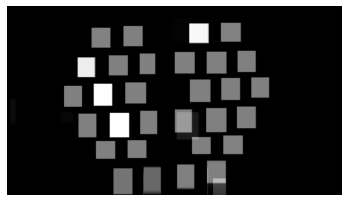

In [40]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


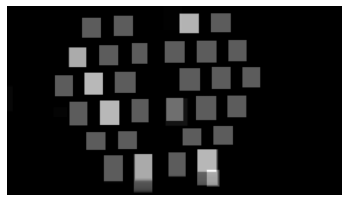

In [54]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


In [70]:
# filter matrix for only values higher than 50

def filterMatrix(matrix, threshold):
    matrix_copy = matrix.copy()
    image_shape = matrix.shape
    for x in range(image_shape[0]):
        for y in range(image_shape[1]):
            if matrix[x][y] < threshold:
                matrix_copy[x][y] = 0.0

    return matrix_copy

    

In [71]:
matrix1 = filterMatrix(matrix, 50)

In [74]:
matrix1

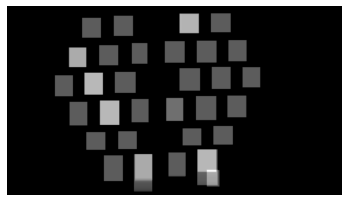

In [75]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


In [76]:
import cv2

image = cv2.imread(image_path)

In [77]:
import cv2

# Convert the matrix to a binary image
ret, binary_image = cv2.threshold(matrix.astype('uint8'), 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Display the image with contours
cv2.imshow("Image with Contours", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [81]:
import cv2

# Convert the matrix to a binary image
ret, binary_image = cv2.threshold(matrix.astype('uint8'), 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around the contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with rectangles
cv2.imshow("Image with Rectangles", image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [82]:
################ put nest detection functions together #####################

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/nest_results.csv')

In [40]:
import cv2

image_path = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/outputs/nest_frames/2023-05-29_14_20_01/frame_50.jpg"
image = cv2.imread(image_path)
image_shape = image.shape[:2]


In [41]:
image_shape

(720, 1280)

In [46]:
# create a matrix for image
matrix = np.zeros((image_shape[0], image_shape[1]))

<IPython.core.display.Javascript object>

In [47]:
# extract detections
import ast
detections = []
for frame in data["detections_coordinates"].tolist():
    frame = ast.literal_eval(frame)
    for delection in frame:
        detections.append(delection)

In [48]:
# update matrix according to detections
def updateMatrix(x_start, y_start, width, height):
    for x in range(int(x_start-(width/2)), int(x_start + (width/2))):
        for y in range(int(y_start-(height/2)), int(y_start + (height/2))):
            matrix[y][x] += 1


for detection in detections:
    try:
        updateMatrix(int(detection[0]), int(detection[1]), int(detection[2]), int(detection[3]))
    except:
        print(detection)

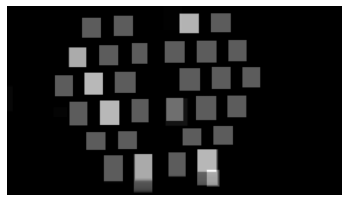

In [49]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


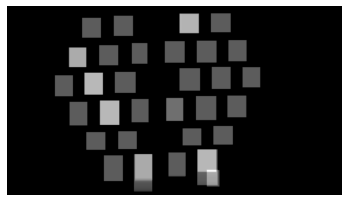

In [50]:
# filter matrix for only values higher than 50

def filterMatrix(matrix, threshold):
    matrix_copy = matrix.copy()
    image_shape = matrix.shape
    for x in range(image_shape[0]):
        for y in range(image_shape[1]):
            if matrix[x][y] < threshold:
                matrix_copy[x][y] = 0.0

    return matrix_copy

matrix1 = filterMatrix(matrix, 50)

import matplotlib.pyplot as plt

plt.imshow(matrix1, cmap='gray')
plt.axis('off')
plt.show()


In [12]:
import cv2

image = cv2.imread(image_path)

In [14]:
# extract contours from matrix 
import cv2

# Convert the matrix to a binary image
ret, binary_image = cv2.threshold(matrix1.astype('uint8'), 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around the contours
coordinates = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    coordinates.append((x, y, w, h))
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with rectangles
#cv2.imshow("Image with Rectangles", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [33]:
sorted_coordinates = sorted(coordinates, key=lambda c: (c[1], c[0]))
sorted_coordinates

df = pd.DataFrame({
    "coordinates": sorted_coordinates,
    "nest_id": range(1, len(sorted_coordinates)+1)
})


In [35]:
df_coordinates = df["coordinates"].tolist()
df_nest_id = df["nest_id"].tolist()

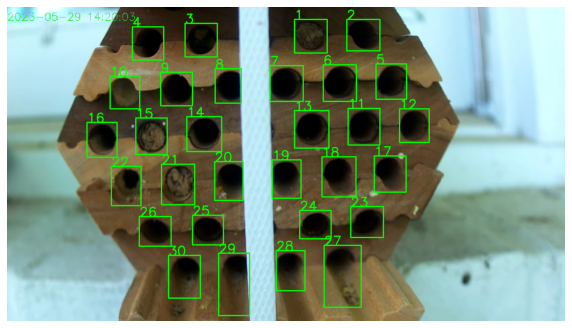

In [39]:
import matplotlib.pyplot as plt

# Plot nest detection on image
for i in range(len(df_coordinates)):
    cords = df_coordinates[i]
    id = df_nest_id[i]
    x, y, w, h = cords
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with rectangles and nest IDs
plt.figure(figsize=(10, 8))  # Adjust the figsize as per your requirement
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [31]:
sorted_df = df1.sort_values(by=['y', 'x'], ascending=[True, False])
sorted_df

,x,y,w,h
28,779,28,76,72
29,659,28,75,77
27,408,37,74,77
26,287,45,72,76
25,846,130,70,81
24,725,132,76,84
23,603,134,76,82
22,477,141,60,79
21,352,149,73,77
20,236,158,68,75


In [30]:
sorted_df = df1.sort_values(by=['x', 'y'], ascending=[False, False])
sorted_df

,x,y,w,h
18,900,233,68,77
25,846,130,70,81
13,842,341,73,83
7,788,457,75,71
19,782,232,73,84
28,779,28,76,72
3,727,546,85,142
24,725,132,76,84
12,722,343,78,92
6,671,466,72,65


In [51]:
#### debug code ###

In [16]:
import pandas as pd
import cv2
import ast
import argparse
import numpy as np
import matplotlib.pyplot as plt


def extracDetections(data):
    detections = []
    for frame in data["detections_coordinates"].tolist():
        frame = ast.literal_eval(frame)
        for delection in frame:
            detections.append(delection)

    return detections

# update matrix according to detections
def updateMatrix(matrix, x_start, y_start, width, height):
    for x in range(int(x_start-(width/2)), int(x_start + (width/2))):
        for y in range(int(y_start-(height/2)), int(y_start + (height/2))):
            matrix[y][x] += 1


def filterMatrix(matrix, threshold):
    '''
    Input:
    matrix: matrix to be filtered
    threshold: threshold for filtering
    
    Output:
    filtered matrix
    '''
    matrix_copy = matrix.copy()
    image_shape = matrix.shape
    for x in range(image_shape[0]):
        for y in range(image_shape[1]):
            if matrix[x][y] < threshold:
                matrix_copy[x][y] = 0.0

    return matrix_copy


def getNestCords(matrix):
    # Convert the matrix to a binary image
    ret, binary_image = cv2.threshold(matrix.astype('uint8'), 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the contours
    coordinates = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        coordinates.append((x, y, w, h))

    return coordinates


def sortCoordinates(coordinates):
    sorted_coordinates = sorted(coordinates, key=lambda c: (c[1], c[0]))
    return sorted_coordinates

def createVisualisation(image, df):
    df_coordinates = df["coordinates"].tolist()
    df_nest_id = df["nest_id"].tolist()

    # Plot nest detection on image
    for i in range(len(df_coordinates)):
        cords = df_coordinates[i]
        id = df_nest_id[i]
        x, y, w, h = cords
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Save image_rgb as an image file
    cv2.imwrite("output_image.jpg", image_rgb)

In [17]:
data = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/nest_results.csv"
image = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/outputs/nest_frames/2023-05-29_14_20_01/frame_1.jpg"

In [18]:
data = pd.read_csv(data)
image = cv2.imread(image)
image_shape = image.shape[:2]

# create a matrix for image
matrix = np.zeros((image_shape[0], image_shape[1]))

# get all nest detections
detections = extracDetections(data)


# update matrix with nest detections
for detection in detections:
    try:
        updateMatrix(matrix, int(detection[0]), int(detection[1]), int(detection[2]), int(detection[3]))
    except:
        continue

#print(matrix)

# filter matrix
filtered_matrix = filterMatrix(matrix, 50)

# get nest coordinates
nest_coordinates = getNestCords(filtered_matrix)

#print(nest_coordinates)

sorted_coordinates = sortCoordinates(nest_coordinates)

print(sorted_coordinates)

df = pd.DataFrame({"coordinates": sorted_coordinates, "nest_id": [i for i in range(len(sorted_coordinates))]})

df.to_csv("nest_output.csv", index=False)

createVisualisation(image, df)



[(659, 28, 75, 77), (779, 28, 76, 72), (408, 37, 74, 77), (287, 45, 72, 76), (846, 130, 70, 81), (725, 132, 76, 84), (603, 134, 76, 82), (477, 141, 60, 79), (352, 149, 73, 77), (236, 158, 68, 75), (782, 232, 73, 84), (900, 233, 68, 77), (659, 237, 79, 86), (412, 251, 80, 80), (295, 254, 72, 84), (183, 264, 69, 80), (842, 341, 73, 83), (722, 343, 78, 92), (608, 350, 66, 88), (476, 354, 65, 89), (354, 360, 76, 93), (239, 365, 68, 90), (788, 457, 75, 71), (671, 466, 72, 65), (425, 477, 71, 68), (303, 480, 73, 68), (727, 546, 85, 142), (617, 558, 66, 92), (485, 564, 71, 143), (370, 569, 73, 98)]


In [19]:
df

,coordinates,nest_id
0,"(659, 28, 75, 77)",0
1,"(779, 28, 76, 72)",1
2,"(408, 37, 74, 77)",2
3,"(287, 45, 72, 76)",3
4,"(846, 130, 70, 81)",4
5,"(725, 132, 76, 84)",5
6,"(603, 134, 76, 82)",6
7,"(477, 141, 60, 79)",7
8,"(352, 149, 73, 77)",8
9,"(236, 158, 68, 75)",9


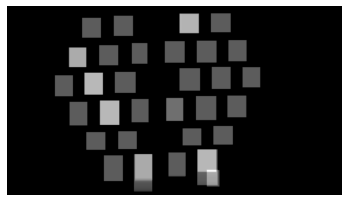

In [9]:
import matplotlib.pyplot as plt

plt.imshow(filtered_matrix, cmap='gray')
plt.axis('off')
plt.show()


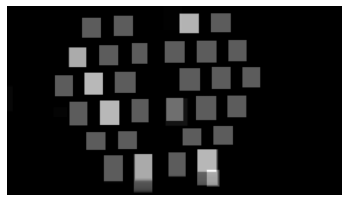

In [10]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


In [20]:
# January 11, 2024
# Time 1:54 pm
# Task: Experiment with motion tracking using matrix and contours

In [21]:
FRAME_RATE = 30 # frames per second
SILENT_FRAME = '(0, 0, 0, 0)'

In [22]:
## function to get activity ranges ##
def getActivityRanges(lst, element):
    ''' 
    Input:
    lst: the list of motion coordinate detections on all frames
    element: seperator between activity detections (0,0,0,0)

    Output:
    list with ranges of frame indexes of all detections
    '''
    occurrence_ranges = []
    start_index = None

    for i, item in enumerate(lst):
        if item != element:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                end_index = i - 1
                occurrence_ranges.append((start_index, end_index))
                start_index = None

    if start_index is not None:
        # If the last element in the list is the target element
        end_index = len(lst) - 1
        occurrence_ranges.append((start_index, end_index))

    return occurrence_ranges



In [23]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/results.csv')

In [26]:
## get activity periods ##
activity_periods = getActivityRanges(data["motions_coordinates"].tolist(), SILENT_FRAME)

# filter activity_periods and remove noises
activity_periods = [activity_period for activity_period in activity_periods if activity_period[1]- activity_period[0] > 1 ]

In [51]:
# process one activity
activity_range = activity_periods[2]

In [65]:
max([x[1]-x[0] for x in activity_periods])

455

{'whiskers': [<matplotlib.lines.Line2D at 0x178718370>,
 'caps': [<matplotlib.lines.Line2D at 0x17871a590>,
 'boxes': [<matplotlib.lines.Line2D at 0x17871ab30>],
 'medians': [<matplotlib.lines.Line2D at 0x17871b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1787184f0>],
 'means': []}

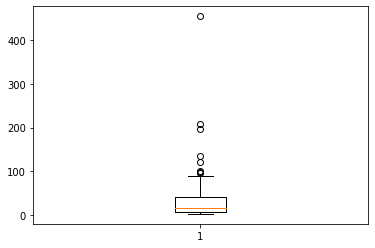

In [69]:
dt = [x[1]-x[0] for x in activity_periods]
plt.boxplot(dt)

In [ ]:
# the average activity period is 43 frames, which is 1.4 seconds
# the longest activity is 455 frames, which is 15 seconds
# We will assume that 3 secons is the expected activity period, so 90 frames

In [60]:
data.head()

,frame_number,motions_coordinates,detections_coordinates,detections_classes,frame_motions,frame_detections
0,1,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
1,2,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
2,3,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
3,4,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]
4,5,"(0, 0, 0, 0)","(0, 0, 0, 0)",[],[],[]


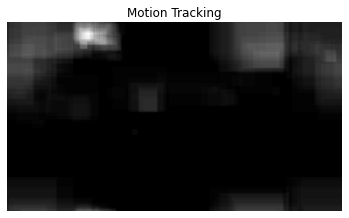

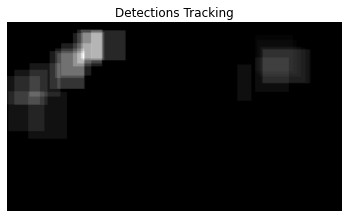

In [133]:
# process one activity
activity_range = activity_periods[16]
# extract activity information
frame_numbers = data["frame_number"].tolist()[activity_range[0]: activity_range[1]]
average_motion_coords = data["motions_coordinates"].tolist()[activity_range[0]: activity_range[1]]
average_dectections_coords = data["detections_coordinates"].tolist()[activity_range[0]: activity_range[1]]
detections_classes = data["detections_classes"].tolist()[activity_range[0]: activity_range[1]]
all_motion_cords = data["frame_motions"].tolist()[activity_range[0]: activity_range[1]]
all_detections_cords = data["frame_detections"].tolist()[activity_range[0]: activity_range[1]]

# decrement frame numbers by 
frame_numbers = [frame_number - frame_numbers[0] for frame_number in frame_numbers]
#frame_numbers


# extract all motions 
motion_tracking = []
motion_frame_numbers = []
for i in range(len(all_motion_cords)):
    frame = all_motion_cords[i]
    frame_number = frame_numbers[i]
    for cord in ast.literal_eval(frame):
        motion_tracking.append(cord)
        motion_frame_numbers.append(frame_number)


# extract all detections
detections_tracking = []
detections_frame_numbers = []
for i in range(len(all_detections_cords)):
    frame = all_detections_cords[i]
    frame_number = frame_numbers[i]
    for cord in ast.literal_eval(frame):
        detections_tracking.append(cord)
        detections_frame_numbers.append(frame_number)


# create tracking matrix
matrix = np.zeros((720, 1280))
detection_matrix = np.zeros((720, 1280))


# update matrix according to detections
def updateMatrix(matrix, x_start, y_start, width, height, frame_number, multiplier=1):
    matrix_copy = matrix.copy()
    for x in range(int(x_start-(width/2)), int(x_start + (width/2))):
        for y in range(int(y_start-(height/2)), int(y_start + (height/2))):
            matrix_copy[y][x] += 1 + frame_number * multiplier

    return matrix_copy


# update matrix with motion tracking
updated_matrix = matrix.copy()
for i in range(len(motion_tracking)):
    try:
        detection = motion_tracking[i]
        frame_number = motion_frame_numbers[i]
        updated_matrix = updateMatrix(updated_matrix, int(detection[0]), int(detection[1]), int(detection[2]), int(detection[3]), frame_number, 0)
    except:
        print(i)
        continue

import matplotlib.pyplot as plt

plt.imshow(updated_matrix, cmap='gray')
plt.axis('off')
plt.title("Motion Tracking")
plt.show()




# update matrix with detections
updated_detection_matrix = detection_matrix.copy()
for i in range(len(detections_tracking)):
    try:
        detection = detections_tracking[i]
        frame_number = frame_numbers[i]
        updated_detection_matrix = updateMatrix(updated_detection_matrix, int(detection[0]), int(detection[1]), int(detection[2]), int(detection[3]), frame_number, 10)
    except:
        print(i)
        continue

import matplotlib.pyplot as plt

plt.imshow(updated_detection_matrix, cmap='gray')
plt.axis('off')
plt.title("Detections Tracking")
plt.show()


In [125]:
### load video and save just activity period ###
video_path = "/Users/edwardamoah/Downloads/2023-05-29_14_20_01.mp4"
output_path = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/outputs/research"


In [128]:
import cv2

# Load the video
video = cv2.VideoCapture(video_path)

# Iterate over each activity period
for i, activity_period in enumerate(activity_periods):
    start_frame = activity_period[0]
    end_frame = activity_period[1]

    # Set the starting frame
    video.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    # Create a VideoWriter object to save the frames as a video file
    output_file = f"{output_path}/activity_period_{i}.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = video.get(cv2.CAP_PROP_FPS)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

    # Extract and save the frames in the activity period
    for frame_number in range(start_frame, end_frame + 1):
        ret, frame = video.read()
        if ret:
            writer.write(frame)

    # Release the VideoWriter object
    writer.release()

# Release the video object
video.release()


In [134]:
# Notes
# Period detection algorithm needs to be improved. There are some noises in the data 
# Where there are noise detections. The noise are brief and can be removed by filtering 
# For now we will proceed with the algorithm and improve it later.
#    1. Period detection algorithm detects noises
#    2. Noise filtering is needed to remove noises
#    3. Some noise are movement behind the nest


In [135]:
##### Motion and Nest Detection #####

In [153]:
nests = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/nest_output.csv')
motion = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/motion_output.csv')

In [156]:
#motion.head()
motion_trajectory = motion["trajectory"].tolist()
motion_timestamp = motion["timestamp"].tolist()
motion_class = motion["classes"].tolist()

In [157]:
#nests.head()
nest_coordinates = nests["coordinates"].tolist()
nest_id = nests["nest_id"].tolist()

In [159]:
import ast

In [161]:
motion_trajectory = [ast.literal_eval(x) for x in motion_trajectory]

In [164]:
def calculate_overlap(box1, box2):
    # Extract coordinates and dimensions from the boxes
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    # Calculate the coordinates of the overlapping region
    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    
    # Calculate the area of the overlapping region
    overlap_area = x_overlap * y_overlap
    
    # Calculate the area of each bounding box
    area_box1 = w1 * h1
    area_box2 = w2 * h2
    
    # Calculate the total area covered by both boxes (union)
    total_area = area_box1 + area_box2 - overlap_area
    
    # Calculate the overlap ratio
    overlap_ratio = overlap_area / total_area
    
    return overlap_ratio



In [201]:
#nests.head()
nest_coordinates = nests["coordinates"].tolist()
nest_ids = nests["nest_id"].tolist()

def trajectoryNest(trajectory):
    '''
    Input: 
    trajectory: [(x_start, y_start, w, h), (x_end, y_end, w, h)]

    Output:
    nest_id: nest id of the nest that the trajectory overlaps with
    '''
    trajectory = ast.literal_eval(trajectory)
    start_position = ast.literal_eval(trajectory[0])
    end_position = ast.literal_eval(trajectory[1])

    # get start and end nest if trajectory overlaps with nest
    start_nest = {}
    end_nest = {}

    # start position
    for i in range(len(nest_coordinates)):
        nest = ast.literal_eval(nest_coordinates[i])
        nest_id = nest_ids[i]
        overlap_ratio = calculate_overlap(start_position, nest)
        if overlap_ratio > 0.01:
            start_nest[nest_id] = overlap_ratio
        

    # end position
    for i in range(len(nest_coordinates)):
        nest = ast.literal_eval(nest_coordinates[i])
        nest_id = nest_ids[i]
        overlap_ratio = calculate_overlap(end_position, nest)
        if overlap_ratio > 0.01:
            end_nest[nest_id] = overlap_ratio

    # get nest id with highest overlap ratio
    if len(start_nest) == 0:
        start_nest_id = ""
    else:
        start_nest_id = max(start_nest, key=start_nest.get)

    if len(end_nest) == 0:
        end_nest_id = ""
    else:
        end_nest_id = max(end_nest, key=end_nest.get)

    return [start_nest_id, end_nest_id]


In [202]:
motion["nest_id"] = motion["trajectory"].apply(trajectoryNest)

In [206]:
dict = {
    0: "carpenter_bee",
    1: "closed_nest",
    2: "leafcutting_bee",
    3: "open_nest",
    4: "wasp"
}
def decodeClass(id):
    try:
        return dict[id]
    except:
        return "Unknown"

In [207]:
motion["class"] = motion["classes"].apply(decodeClass)

In [209]:
def getAction(nest_ids):
    start_nest_id = nest_ids[0]
    end_nest_id = nest_ids[1]

    if start_nest_id == end_nest_id:
        return "In Nest"
    elif start_nest_id == "":
        return "Entering Nest"
    elif end_nest_id == "":
        return "Leaving Nest"
    elif start_nest_id != end_nest_id and start_nest_id != "" and end_nest_id != "":
        return "Moving Between Nests"
    else:
        return "Unknown"

In [210]:
motion["action"] = motion["nest_id"].apply(getAction)

In [211]:
motion 

,objects_num,classes,trajectory,timestamp,nest_id,class,action
0,1,4.0,"['(0.0, 339.0, 89.0, 103.0)', '(733.0, 196.0, ...","[6.3, 13.2]","[, 5]",wasp,Entering Nest
1,1,2.0,"['(747.0, 206.0, 31.0, 18.0)', '(625.0, 211.0,...","[14.466666666666667, 16.933333333333334]","[5, 6]",leafcutting_bee,Moving Between Nests
2,1,4.0,"['(0.0, 388.0, 23.0, 45.0)', '(926.0, 283.0, 3...","[20.3, 35.46666666666667]","[, 11]",wasp,Entering Nest
3,1,NaN,"['(296.0, 87.0, 26.0, 29.0)', '(298.0, 89.0, 2...","[46.7, 46.93333333333333]","[3, 3]",Unknown,In Nest
4,1,NaN,"['(295.0, 89.0, 25.0, 27.0)', '(292.0, 89.0, 2...","[66.4, 66.5]","[3, 3]",Unknown,In Nest
5,1,NaN,"['(294.0, 88.0, 26.0, 28.0)', '(297.0, 88.0, 2...","[66.8, 67.16666666666667]","[3, 3]",Unknown,In Nest
6,1,4.0,"['(913.0, 249.0, 16.0, 29.0)', '(925.333333333...","[68.6, 71.93333333333334]","[11, ]",wasp,Leaving Nest
7,1,NaN,"['(299.0, 81.0, 66.0, 38.0)', '(310.5, 64.5, 3...","[73.23333333333333, 73.43333333333334]","[3, 3]",Unknown,In Nest
8,1,NaN,"['(319.5, 72.5, 28.0, 34.5)', '(297.0, 89.0, 2...","[73.5, 74.2]","[3, 3]",Unknown,In Nest
9,1,NaN,"['(0.0, 112.0, 33.0, 65.0)', '(73.5, 332.0, 52...","[81.53333333333333, 81.76666666666667]","[, ]",Unknown,In Nest
